In [41]:
import numpy as np

from funcs import plot_policyfunc, plot_valuefunc, value_it_stratComp, value_it_stratComp_gen, simulate_mw_bertrand, plot_price_dev, plot_share_dev
from scipy.interpolate import interp1d #functional interpolation

import matplotlib.pyplot as plt #plotting



## Test functionality of value_it_stratComp_gen

Question - want to find pairs of policy functions, so that both are best responses to the other.

Way to search for them: version of policy iteration: start with policies for both players. Update value functions, and then policy functions respectively. 


In [42]:
n_points = 400
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points-1)]
p_list = [ (1/(n_points))*(i) for i in range(0,n_points+1)]
Eta=0.1

converged successfully in 191 iterations


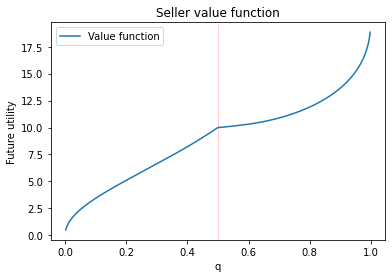

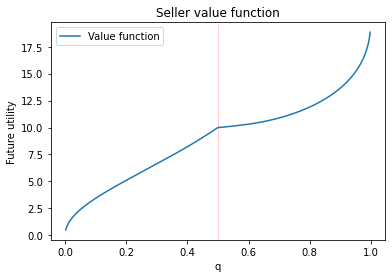

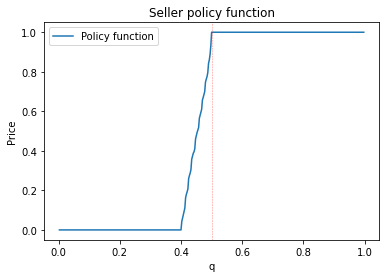

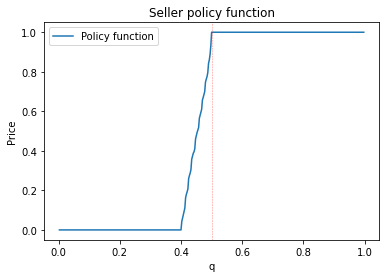

In [43]:
res = value_it_stratComp_gen(s_list,
                             p_list,
                             beta=0.95,
                             eta=Eta,
                             max_iterations=2000)

plot_valuefunc(s_list,res['value_function_1'])
plot_valuefunc(s_list,res['value_function_2'])

plot_policyfunc(s_list,res['policy_function_1'])
plot_policyfunc(s_list,res['policy_function_2'])


#save policy functions

policy_function_1 = interp1d(s_list,
                         res['policy_function_1'],
                         kind='linear', fill_value='extrapolate')

policy_function_2 = interp1d(s_list,
                         res['policy_function_2'],
                         kind='linear', fill_value='extrapolate')

Find min share so that p=1

In [45]:
s_list[np.where(np.array(res['policy_function_1']) == 1)[0][0]]
s_list[np.where(np.array(res['policy_function_2']) == 1)[0][0]]

0.5

## Multiplicity of equilibria?

We show that there may be multiple equilibria. However, all we have found seem to result in the max price

In [47]:
n_points = 400
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points-1)]
p_list = [ (1/(n_points))*(i) for i in range(0,n_points+1)]
Eta=0.1
Beta=0.99

In [48]:
res = value_it_stratComp_gen(s_list,
                             p_list,
                             beta=Beta,
                             eta=Eta,
                             max_iterations=3000)

converged successfully in 984 iterations


In [49]:
res_eq = value_it_stratComp(s_list,
                             p_list,
                             beta=Beta,
                             eta=Eta,
                             max_iterations=3000)

converged successfully in 919 iterations


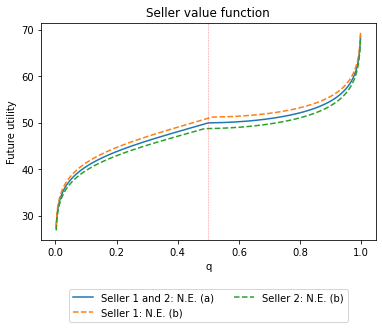

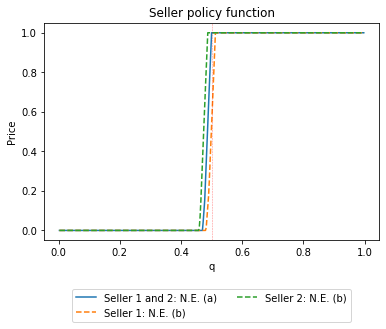

In [50]:
### plot seller value function 
plt.plot(s_list, res_eq['value_function'], label='Seller 1 and 2: N.E. (a)') # Add this line for values1
plt.plot(s_list,res['value_function_1'], label='Seller 1: N.E. (b)', linestyle='--')
plt.plot(s_list, res['value_function_2'], label='Seller 2: N.E. (b)', linestyle='--') # Add this line for values1
plt.axvline(x=0.5, color='red', linestyle='--',alpha=0.5,linewidth=0.5)
plt.xlabel('q')
plt.ylabel('Future utility')
plt.title('Seller value function')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Adjust the values as needed
plt.show()


### plot seller policy function 
plt.plot(s_list, res_eq['policy_function'], label='Seller 1 and 2: N.E. (a)') # Add this line for values1
plt.plot(s_list,res['policy_function_1'], label='Seller 1: N.E. (b)', linestyle='--')
plt.plot(s_list, res['policy_function_2'], label='Seller 2: N.E. (b)', linestyle='--') # Add this line for values1
plt.axvline(x=0.5, color='red', linestyle='--',alpha=0.5,linewidth=0.5)
plt.xlabel('q')
plt.ylabel('Price')
plt.title('Seller policy function')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Adjust the values as needed
plt.show()




#plot_policyfunc(s_list,res['policy_function_1'])
#plot_policyfunc(s_list,res['policy_function_2'])

In [51]:
#characterise cutoffs

print(s_list[np.where(np.array(res['policy_function_1']) == 1)[0][0]])
print(s_list[np.where(np.array(res['policy_function_2']) == 1)[0][0]])

#check code works - this should terminate straight away
#good!
res_new = value_it_stratComp_gen(s_list,
                             p_list,
                             beta=Beta,
                             eta=Eta,
                             max_iterations=2000,
                             starting_policy_1 = np.array(res['policy_function_1']),
                             starting_policy_2 = np.array(res['policy_function_2']),
                             starting_values_1 = np.array(res['value_function_1']),
                             starting_values_2 = np.array(res['value_function_2']))


#lets flip, to see if ends straight away - i.e. we've found equilibrium
#good!
res_new = value_it_stratComp_gen(s_list,
                             p_list,
                             beta=Beta,
                             eta=Eta,
                             max_iterations=2000,
                             starting_policy_1 = np.array(res['policy_function_2']),
                             starting_policy_2 = np.array(res['policy_function_1']),
                             starting_values_1 = np.array(res['value_function_2']),
                             starting_values_2 = np.array(res['value_function_1']))



### will 

0.5125
0.4875
converged successfully in 0 iterations
converged successfully in 0 iterations


In [52]:
res = value_it_stratComp(s_list,
                             p_list,
                             beta=Beta,
                             eta=Eta,
                             max_iterations=2000)

#characterise cutoffs

print(s_list[np.where(np.array(res['policy_function']) == 1)[0][0]])

#check code works - this should terminate straight away
#good!
res_new = value_it_stratComp_gen(s_list,
                             p_list,
                             beta=Beta,
                             eta=Eta,
                             max_iterations=2000,
                             starting_policy_1 = np.array(res['policy_function']),
                             starting_policy_2 = np.array(res['policy_function']),
                             starting_values_1 = np.array(res['value_function']),
                             starting_values_2 = np.array(res['value_function']))


#lets flip, to see if ends straight away - i.e. we've found equilibrium
#good!
res_new = value_it_stratComp_gen(s_list,
                             p_list,
                             beta=Beta,
                             eta=Eta,
                             max_iterations=2000,
                             starting_policy_1 = np.array(res_new['policy_function_2']),
                             starting_policy_2 = np.array(res_new['policy_function_1']),
                             starting_values_1 = np.array(res_new['value_function_2']),
                             starting_values_2 = np.array(res_new['value_function_1']))


converged successfully in 919 iterations
0.5
converged successfully in 69 iterations
converged successfully in 0 iterations


0.47000000000000003
0.5
0.47000000000000003
0.5
0.47000000000000003
0.5


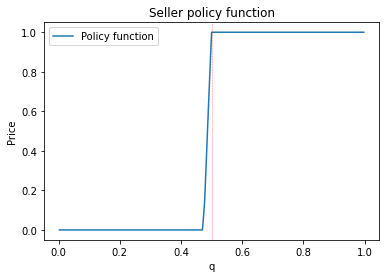

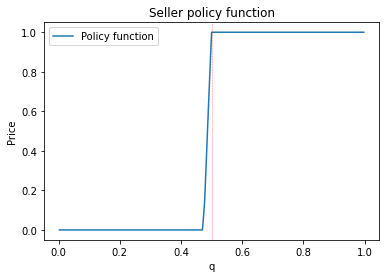

In [53]:
#identical policy functions!
print(s_list[np.where(np.array(res['policy_function']) == 0)[0][-1]])
print(s_list[np.where(np.array(res['policy_function']) == 1)[0][0]])

print(s_list[np.where(np.array(res_new['policy_function_1']) == 0)[0][-1]])
print(s_list[np.where(np.array(res_new['policy_function_1']) == 1)[0][0]])

print(s_list[np.where(np.array(res_new['policy_function_2']) == 0)[0][-1]])
print(s_list[np.where(np.array(res_new['policy_function_2']) == 1)[0][0]])


plot_policyfunc(s_list,res_new['policy_function_1'])
plot_policyfunc(s_list,res_new['policy_function_2'])

## Simulations
Not much new here

In [ ]:
### simulate some 
transcript = simulate_mw_bertrand(policy_function1=policy_function_1,
                                  policy_function2=policy_function_2,
                                  eta = Eta,
                                  starting_share_player_1=0.4)

                                  
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'],title='Seller 1 is strategic, seller 2 plays fixed price of 1')
plot_share_dev(transcript['time'],transcript['share1'],transcript['share2'],title='Seller 1 is strategic, seller 2 plays fixed price of 1')

